# Computer Infrastructure Assignment 2025 

### Submission by Faolán H
-----

In [33]:
# Modules used throughout the assignment - import standard python modules first

#datetime
#https://docs.python.org/3/library/datetime.html
import datetime as dt

#numpy
import numpy as np

# pandas
import pandas as pd

import matplotlib.pyplot as plt

# Yahoo Finance API data
import yfinance as yf


-----

## There are four problems in this assignment structured throughout this Jupyter Notebook as follows:
### - Name the Problem
### - Describe the Problem
### - Solve the Problem
----------

## Problem 1: Data from yfinance

##### Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)
##### The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

# yfinance documentation
https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

In [34]:
#Setting the dataframe. This includes the data for the FAANG companies at a period of 5 days and 60 minute intervals
df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')

/tmp/ipykernel_9871/2860173891.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
[*********************100%***********************]  5 of 5 completed


In [35]:
# Looking at the dataframe index
df.index

DatetimeIndex(['2025-10-27 13:30:00+00:00', '2025-10-27 14:30:00+00:00',
               '2025-10-27 15:30:00+00:00', '2025-10-27 16:30:00+00:00',
               '2025-10-27 17:30:00+00:00', '2025-10-27 18:30:00+00:00',
               '2025-10-27 19:30:00+00:00', '2025-10-28 13:30:00+00:00',
               '2025-10-28 14:30:00+00:00', '2025-10-28 15:30:00+00:00',
               '2025-10-28 16:30:00+00:00', '2025-10-28 17:30:00+00:00',
               '2025-10-28 18:30:00+00:00', '2025-10-28 19:30:00+00:00',
               '2025-10-29 13:30:00+00:00', '2025-10-29 14:30:00+00:00',
               '2025-10-29 15:30:00+00:00', '2025-10-29 16:30:00+00:00',
               '2025-10-29 17:30:00+00:00', '2025-10-29 18:30:00+00:00',
               '2025-10-29 19:30:00+00:00', '2025-10-30 13:30:00+00:00',
               '2025-10-30 14:30:00+00:00', '2025-10-30 15:30:00+00:00',
               '2025-10-30 16:30:00+00:00', '2025-10-30 17:30:00+00:00',
               '2025-10-30 18:30:00+00:00', '2025-1

In [36]:
#This outputs the results from datetime into comma separated values
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.today.html
today = dt.datetime.today()

In [37]:
#This formats today into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

In [38]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
# This brings together the data and format name into a folder specifically created for the outputs
df.to_csv("data/" + "faangdata_" + today_format + ".csv")

-----
## Problem 2: Plotting the data

##### Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

In [39]:
#date.max 
#https://docs.python.org/3/library/datetime.html
data = open('data/faangdata_2025.11.02_17.06.55.csv')
data

<_io.TextIOWrapper name='data/faangdata_2025.11.02_17.06.55.csv' mode='r' encoding='UTF-8'>

In [81]:
#https://stackoverflow.com/questions/75539438/get-a-dataframe-from-a-python-notebook-ipynb-to-another
plotdata = pd.read_csv('data/faangdata_2025.11.02_17.06.55.csv')

In [65]:
date = plotdata.iloc[2:,0]

In [60]:
applclose = plotdata.iloc[2:,1]

In [59]:
amznclose = plotdata.iloc[2:,2]

In [44]:
googclose = plotdata.iloc[2:,3]

In [82]:
metaclose = plotdata.iloc[2:,4]
metacloser = metaclose.round(1)

TypeError: Expected numeric dtype, got object instead.

In [46]:
nflxclose = plotdata.iloc[2:,5]

(array([4., 3., 4., 3., 3., 4., 3., 4., 3., 4.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

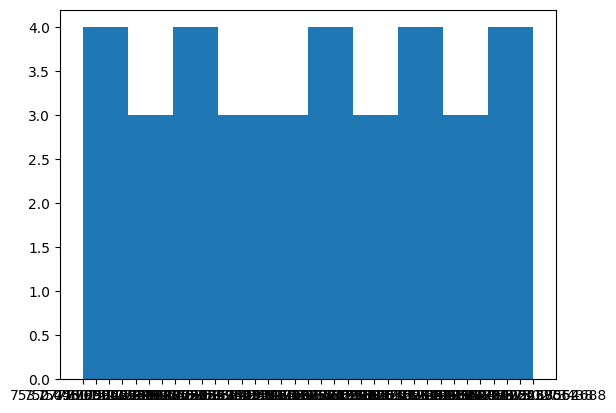

In [71]:
#plt.title ("Closing prices of the FAANG Stocks")
x = plotdata['Close']
plt.hist (metaclose)

-----
## Problem 3: Script
##### Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

-----
## Problem 4: Automation
##### Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

-----
# END
-----